<a href="https://colab.research.google.com/github/EliotAmado/Data-Science-Mini-Projects/blob/main/MLR_Student_Performance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data/Student_Performance.csv')
df

Mounted at /content/drive


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
#Seeing if there are any missing values
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
#Check if there are any duplicates in the df
df.duplicated().sum()

127

In [ ]:
#remove duplicate records
df = df.drop_duplicates()

In [ ]:
#Turn categoricals into dummy code
df_dummy = df.copy()

df_dummy = pd.get_dummies(df_dummy, columns = ['Extracurricular Activities'], drop_first=True )

df_dummy['Extracurricular Activities_Yes'] = pd.to_numeric(df_dummy['Extracurricular Activities_Yes'])

df_dummy

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,True
9996,7,64,8,5,58.0,True
9997,6,83,8,5,74.0,True
9998,9,97,7,0,95.0,True


In [ ]:
df_dummy.dtypes

Hours Studied                         int64
Previous Scores                       int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
Extracurricular Activities_Yes         bool
dtype: object

In [ ]:
#Turn extracurrecular activities into 'int' type
df_dummy = df_dummy.astype(int)
df_dummy

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91,1
1,4,82,4,2,65,0
2,8,51,7,2,45,1
3,5,52,5,2,36,1
4,7,75,8,5,66,0
...,...,...,...,...,...,...
9995,1,49,4,2,23,1
9996,7,64,8,5,58,1
9997,6,83,8,5,74,1
9998,9,97,7,0,95,1


In [ ]:
#Set label and features / generate model
y = df_dummy['Performance Index']
X = df_dummy.drop(columns = ['Performance Index']).assign(const=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        03:56:34   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours St

In [ ]:
model.fittedvalues

0       91.847305
1       63.153299
2       45.053968
3       36.553459
4       67.086264
          ...    
9995    21.607265
9996    56.501443
9997    72.996784
9998    94.361571
9999    65.292304
Length: 9873, dtype: float64

In [ ]:
#MAE/RMSE Stats

print(f"MAE:\t{round(abs(model.fittedvalues - y).mean(), 4)}")
print(f"RMSE:\t{round(((model.fittedvalues - y)**2).mean() ** (1/2), 4)}")

MAE:	1.6231
RMSE:	2.0435


<Axes: xlabel='None', ylabel='Performance Index'>

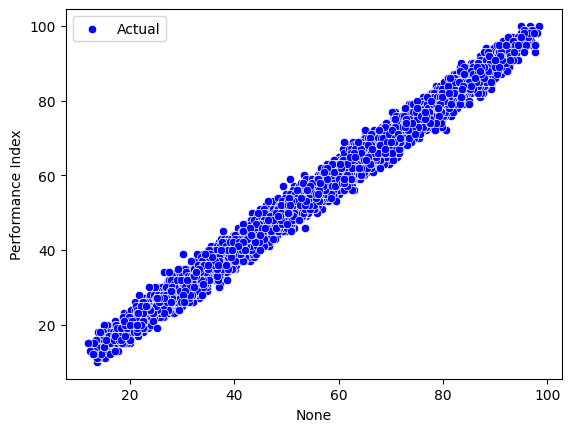

In [ ]:
#Predicted values vs actual values to showcase the accuracy of our model's power to predict 'Performance Index' Based on all the other features

# Plot actual values (data points)
y_pred = model.predict(X)
y_actual = y
sns.scatterplot(data=df, x=y_pred, y=y_actual, color="blue", label="Actual")

<Axes: xlabel='None', ylabel='Performance Index'>

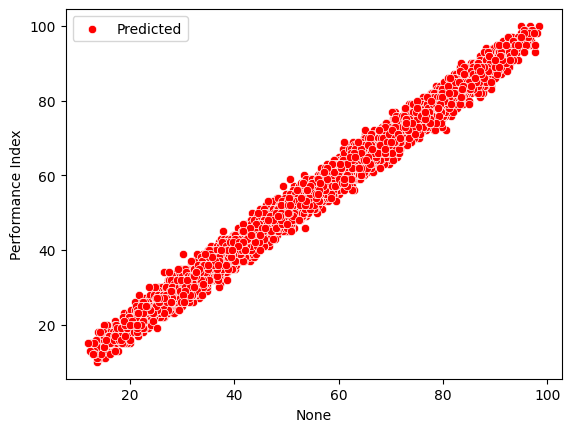

In [ ]:
# Plot predicted values (points on regression line)
sns.scatterplot(data=df, x=y_pred, y='Performance Index', color="red", label="Predicted")

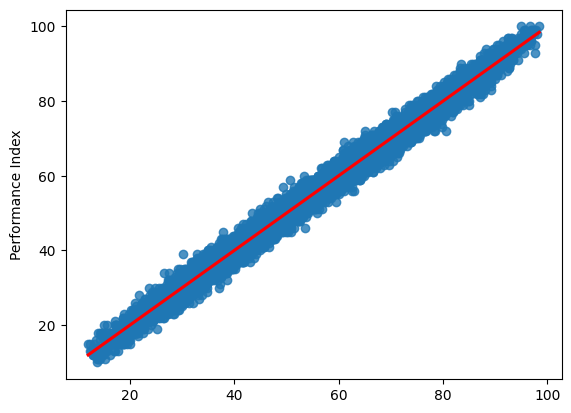

In [ ]:
# MLR Scatterplot with fitted line (correlation from actual values and predicted values)
ax = sns.regplot(data=df, x=y_pred, y=y_actual, line_kws={"color": "red"})

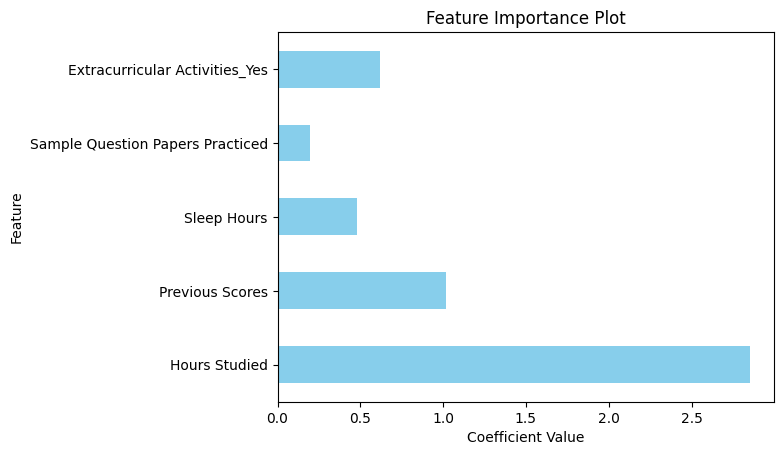

In [ ]:
#Feature importance plot

import matplotlib.pyplot as plt

# Extract coefficients from the fitted MLR model
coefficients = model.params.drop('const')  # Exclude the intercept (constant) term

# Plot the feature importance
coefficients.plot(kind='barh', color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


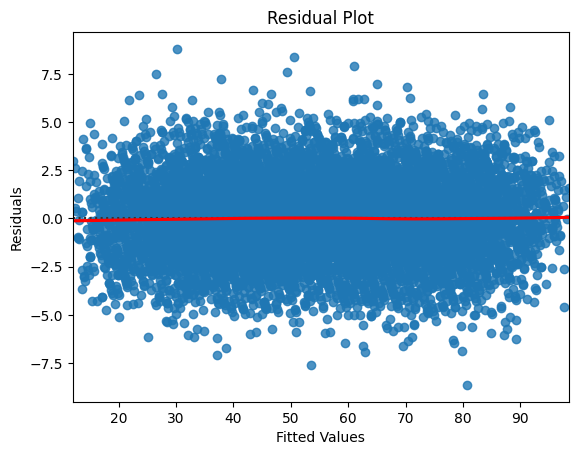

In [ ]:
# Residual Plot
#Shows the validity of the MLR model's assumptions and performance model, and that the model has
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


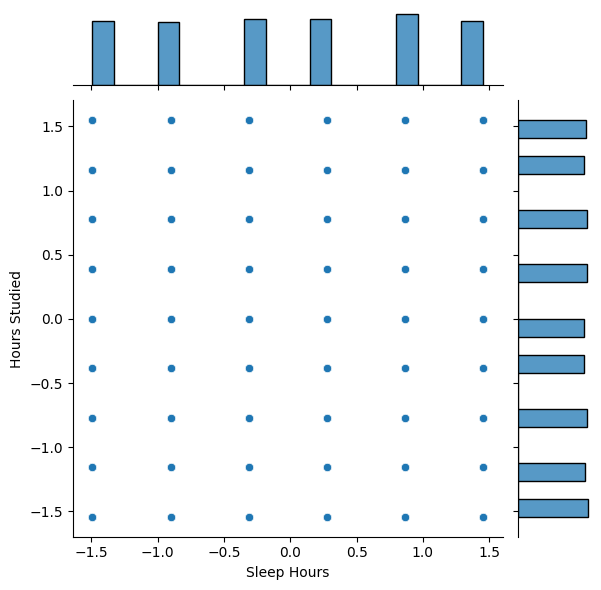

In [ ]:
# Feature Scailing StandardScaler
import seaborn as sns
from sklearn import preprocessing

df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_dummy), columns=df_dummy.columns)
df_zscore.head()

sns.jointplot(df_zscore, x="Sleep Hours", y="Hours Studied");

In [ ]:
print("Mean:\t" + str(df_zscore['Performance Index'].mean()))
print("Std:\t" + str(df_zscore['Performance Index'].std()))
print("Min:\t" + str(df_zscore['Performance Index'].min()))
print("Max:\t" + str(df_zscore['Performance Index'].max()))

Mean:	-9.967605479871759e-17
Std:	1.0000506470156572
Min:	-2.3541024362353697
Max:	2.3315435007341083
